In [14]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
from path import *

action_prop = 0.75
block_prop = 0.6
meal_config=[60, 2]
day = 3
import os
os.makedirs('../export/Figure 4', exist_ok=True)

In [15]:
ctrl_learning_result = []
ctrl_scores = []

for sheet in rev_ctrl_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_ctrl_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    # dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop, export=True)
    ctrl_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [16]:
cask_scores = []
cask_learning_result = []

for sheet in rev_cask_sheets:
    data = read_excel_by_sheet(sheet, rev_cask_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    # dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop, export=True)
    cask_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [17]:
perform_T_test(ctrl_scores, cask_scores, test_side='two-sided')

P Value is  0.1256352998407202
There is no significant difference between the two groups.


Ctrl Size: 27
Cask Size: 24
Ctrl Average: 54.00293844764648
Cask Average: 52.51239680561963
Ctrl Standard Deviation: 0.5969008679775982
Cask Standard Deviation: 0.7336185635774245


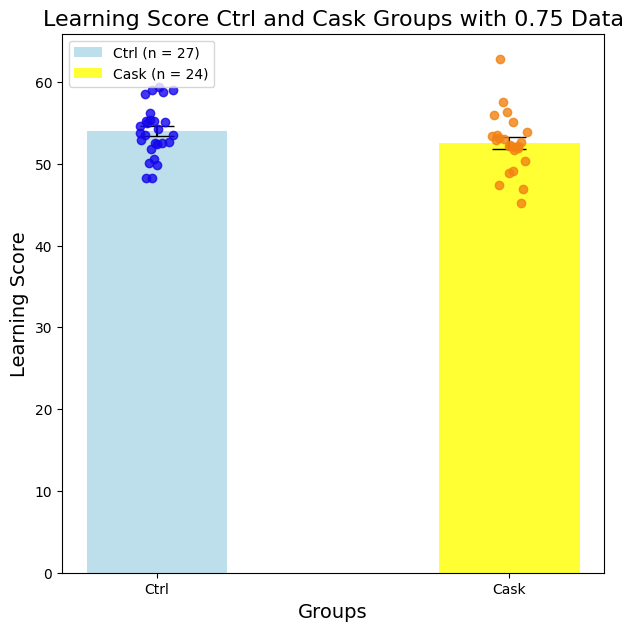

In [18]:
dit.graph_learning_score(ctrl_scores, cask_scores, group_names=['Ctrl', 'Cask'], proportion=action_prop, 
                         export_path='../export/Figure 4/CASK_75_learning_score.svg')

In [7]:
perform_T_test(ctrl_learning_result, cask_learning_result, test_side='greater')

P Value is  0.8925882925561986
There is no significant difference between the two groups.


Ctrl Size: 27
Cask Size: 24
Ctrl Average: 64.80678114358332
Cask Average: 63.543917550793765
Ctrl Standard Deviation: 0.6810873352912588
Cask Standard Deviation: 0.7102311012996898


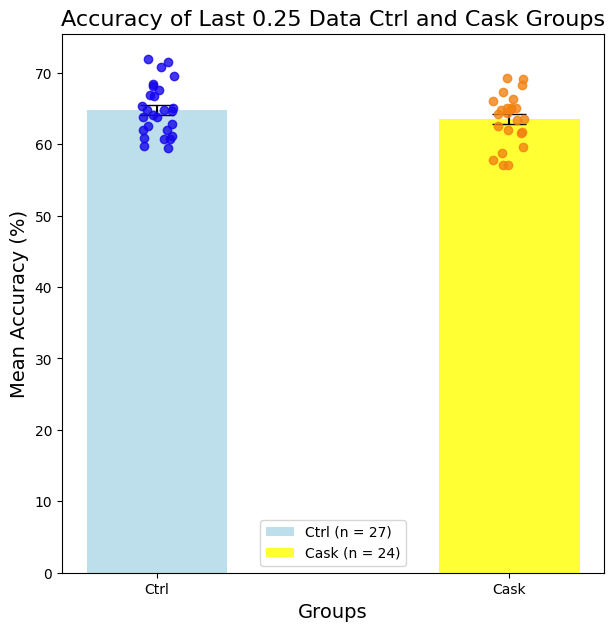

In [8]:
dit.graph_learning_results(ctrl_learning_result, cask_learning_result, proportion=0.25, group_names=['Ctrl', 'Cask'],
                            export_path='../export/Figure 4/CASK_learning_result.svg')

### Pellet Collect Time

In [2]:
export_root = '../export/Figure 3/'
os.makedirs(os.path.join(export_root, 'CASK_retrieval_time'), exist_ok=True)

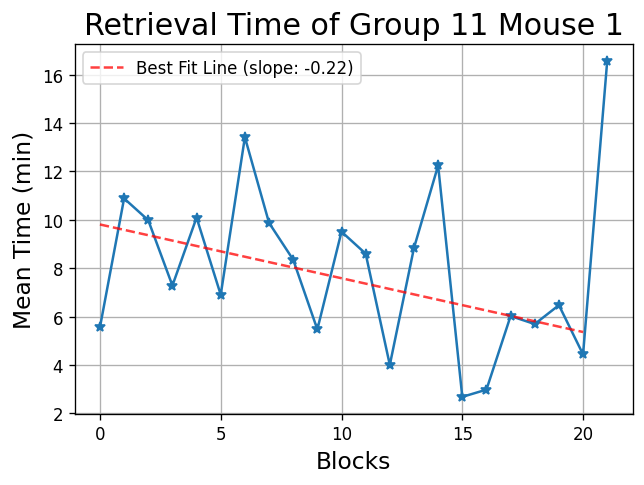

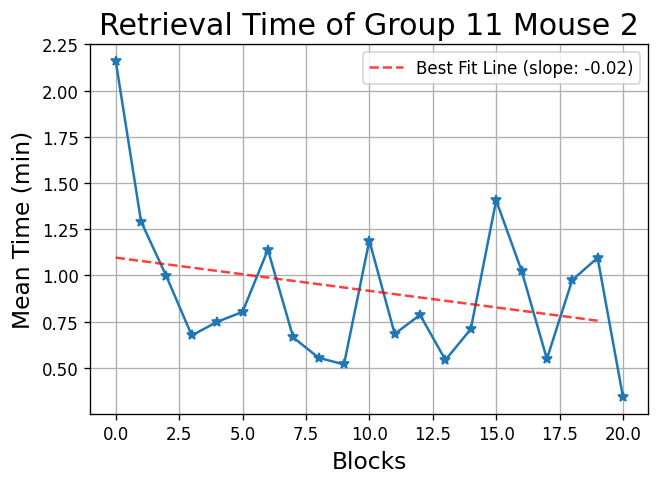

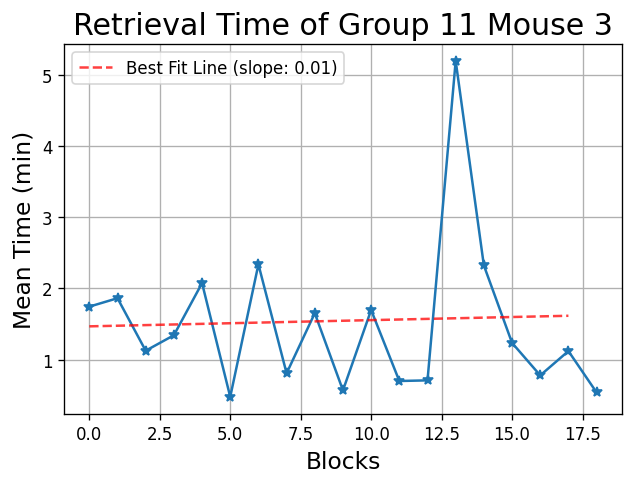

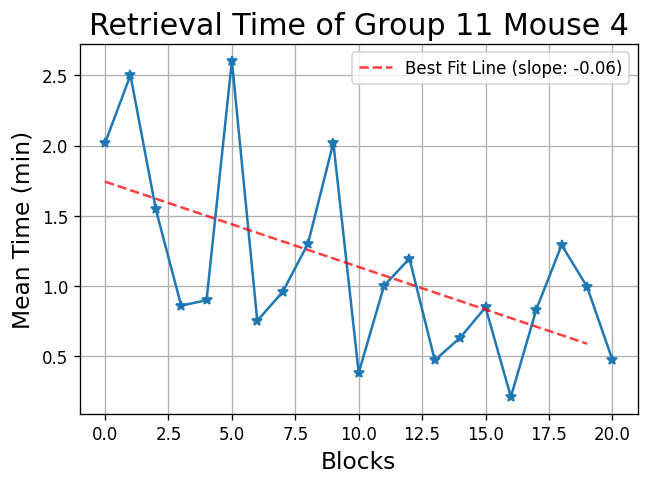

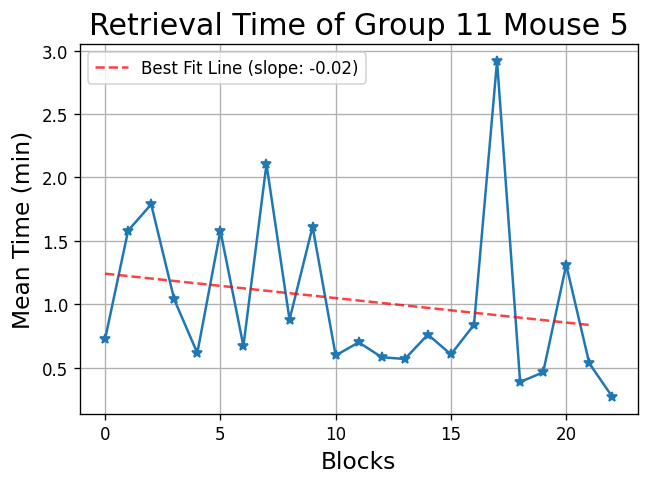

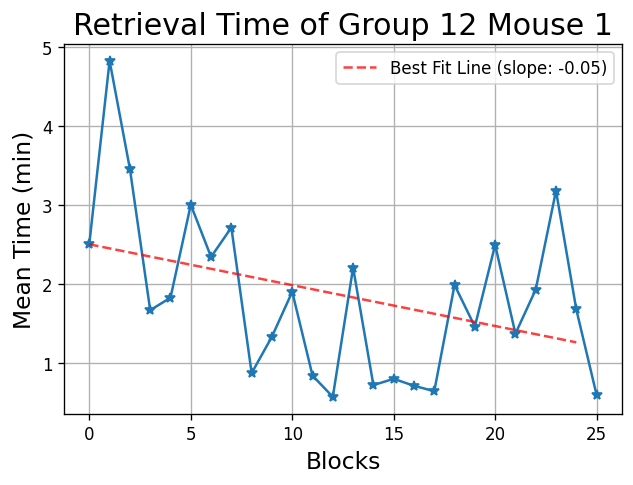

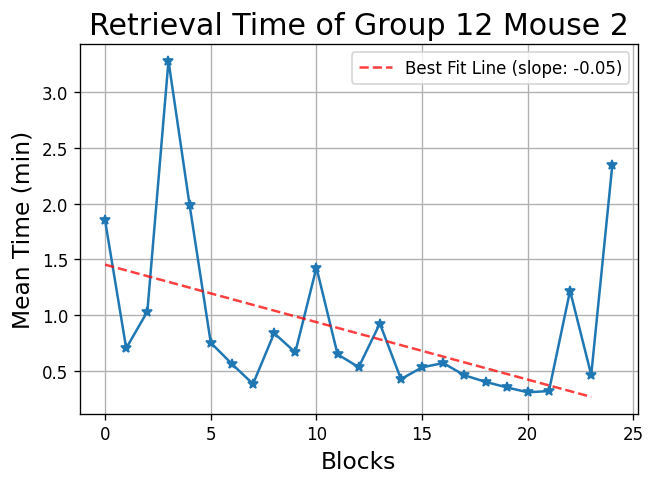

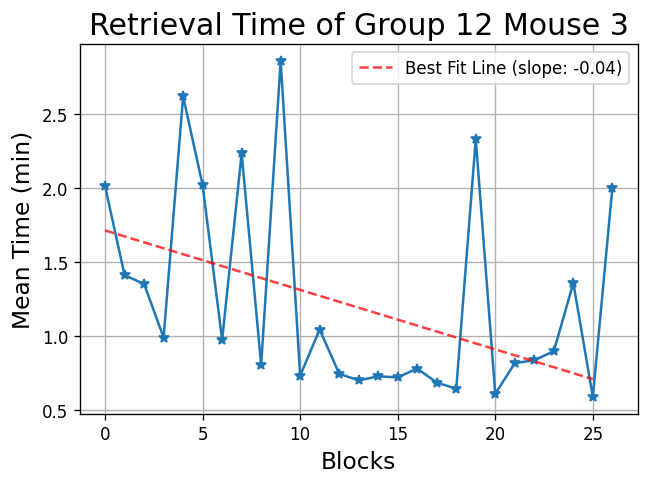

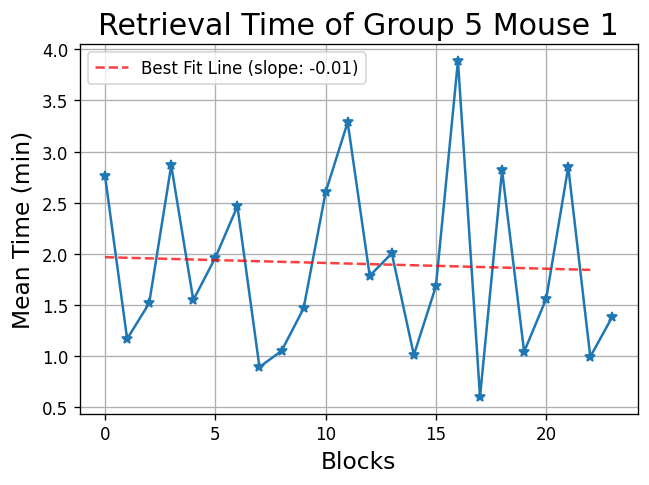

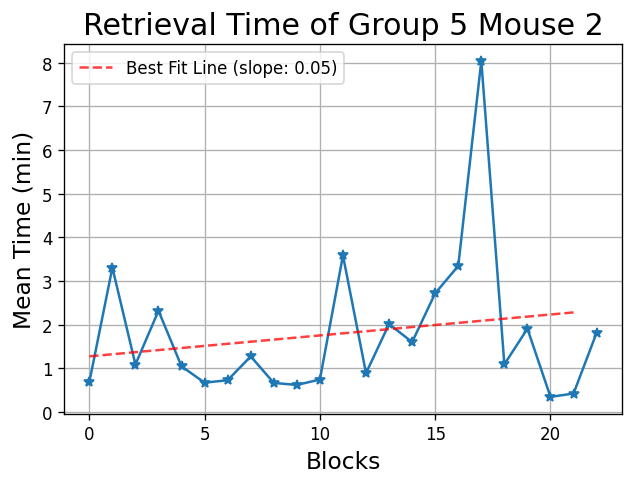

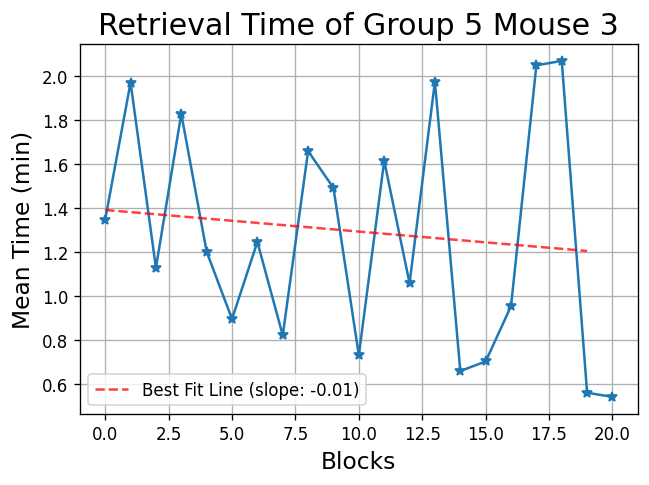

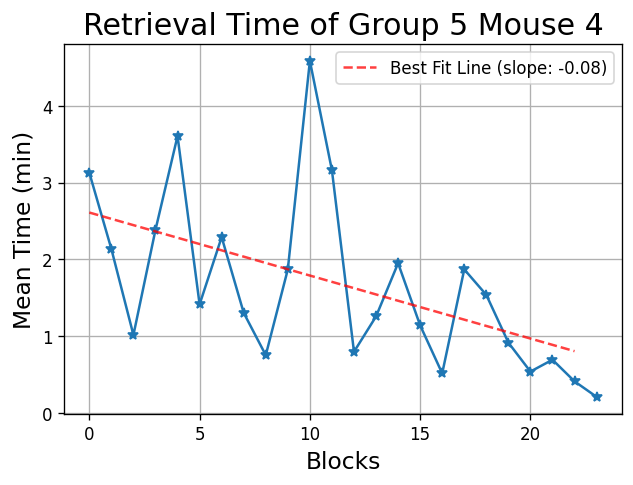

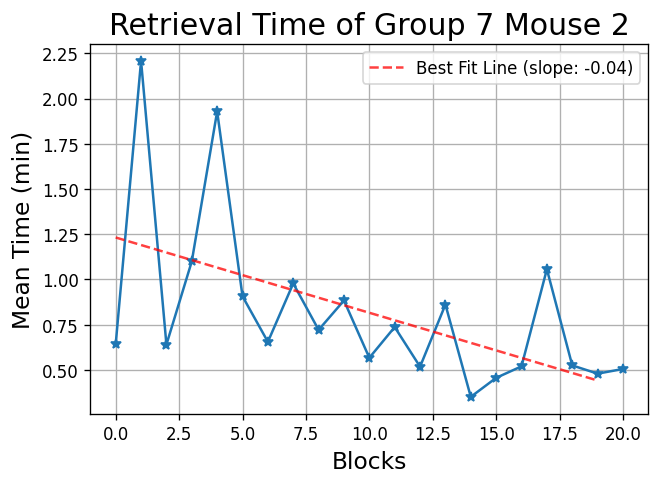

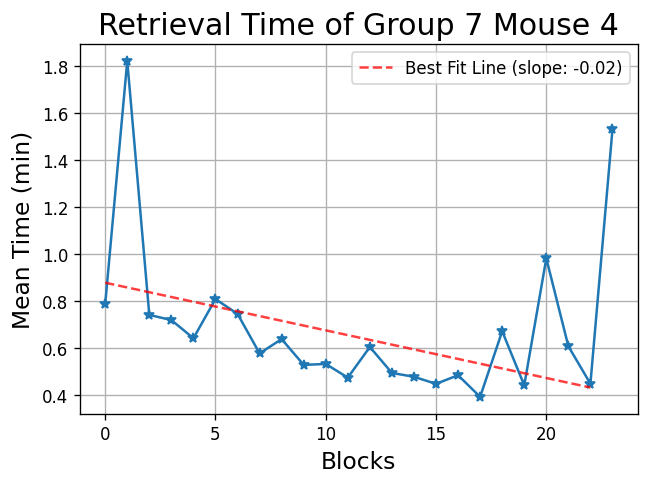

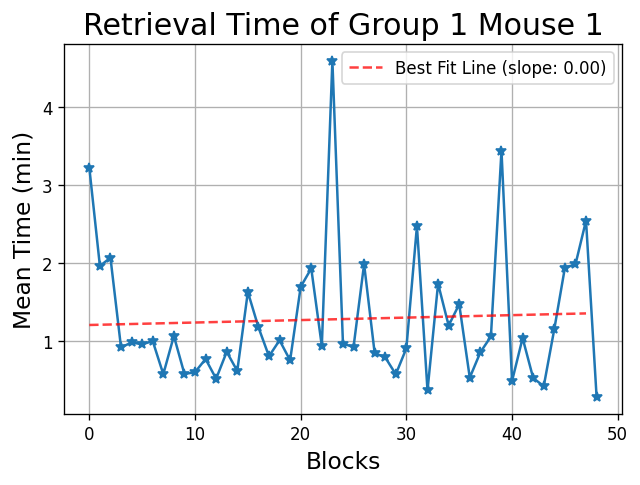

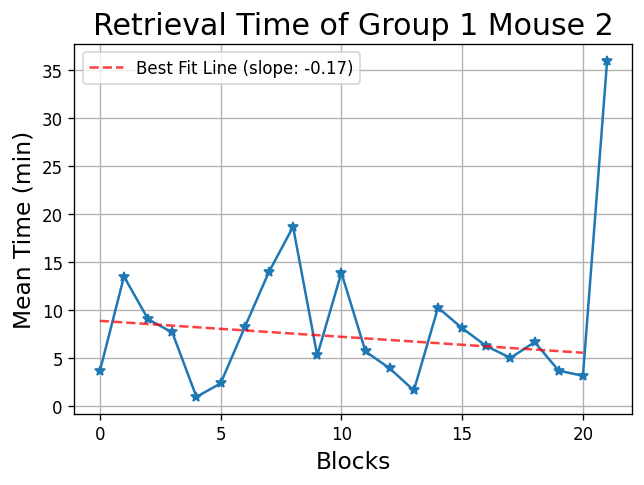

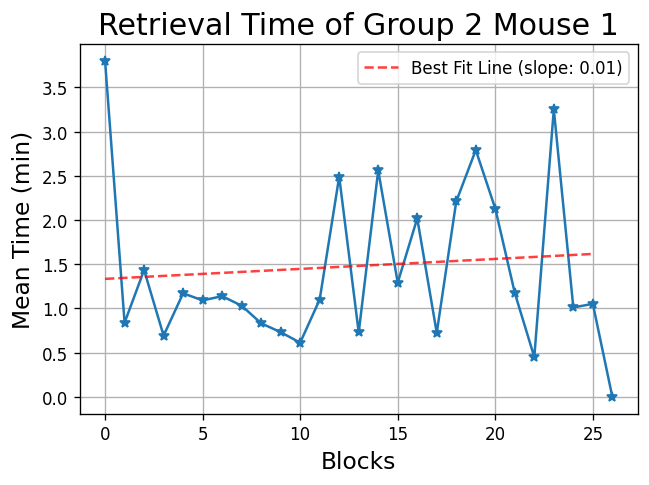

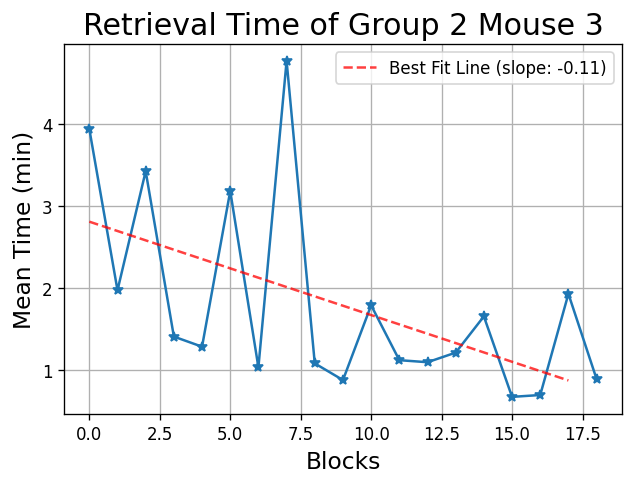

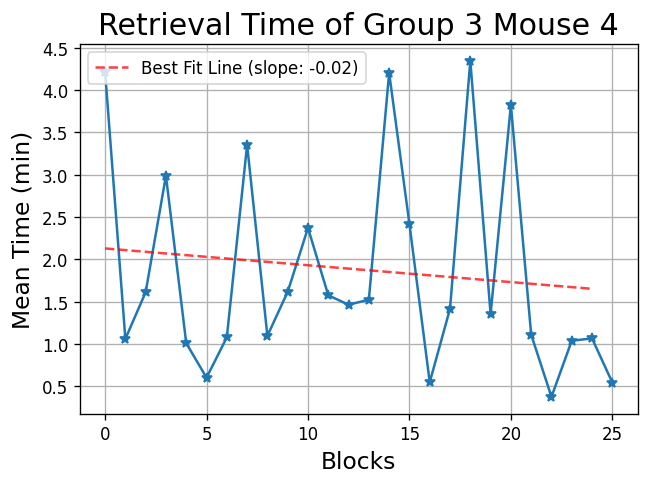

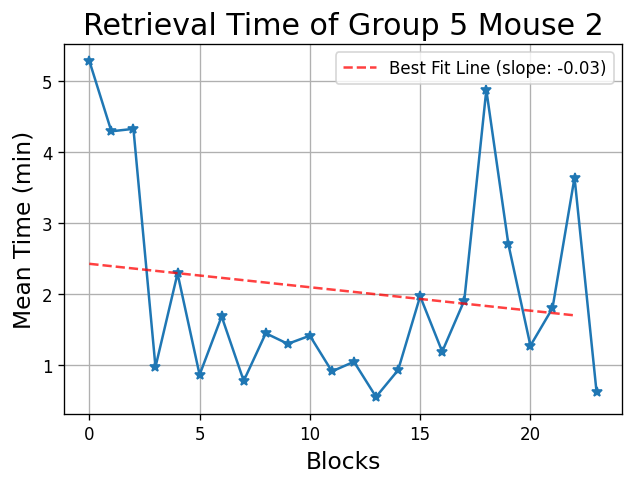

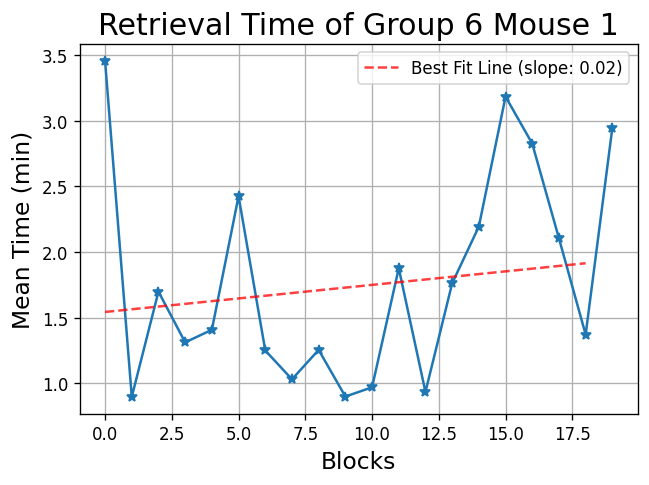

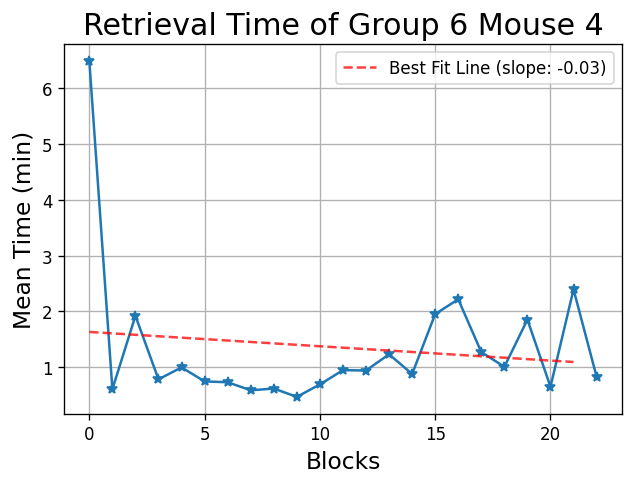

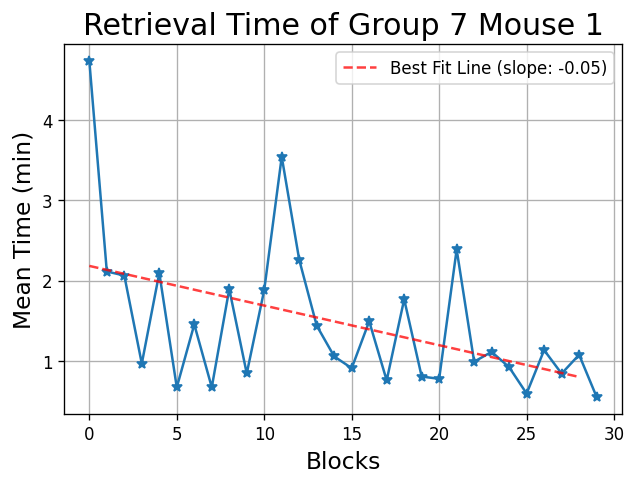

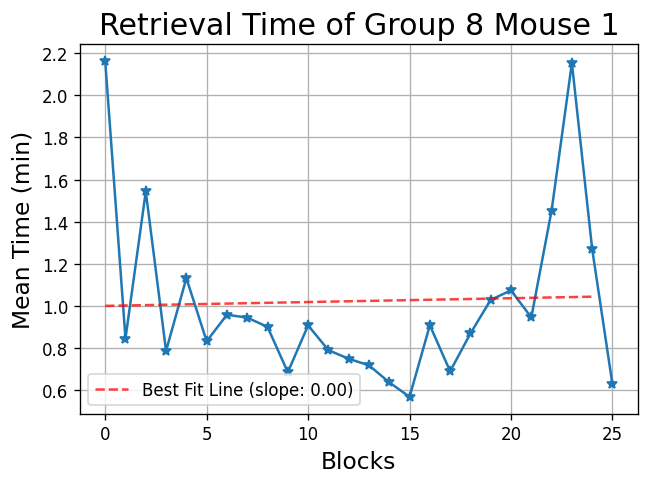

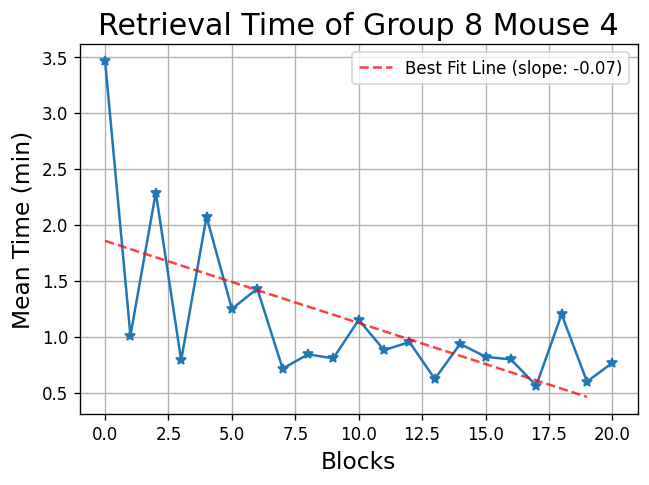

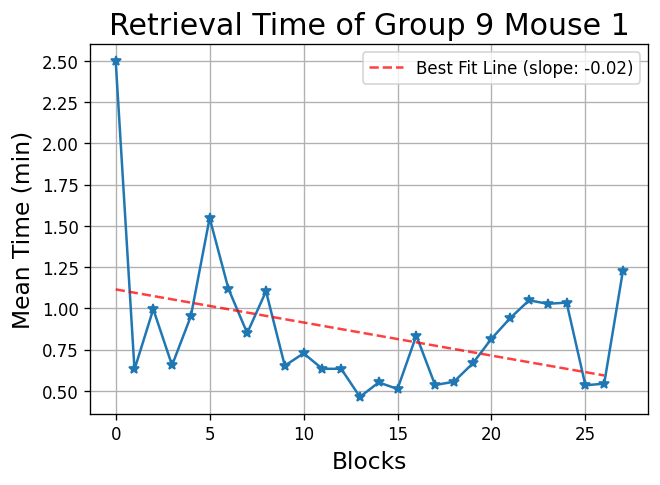

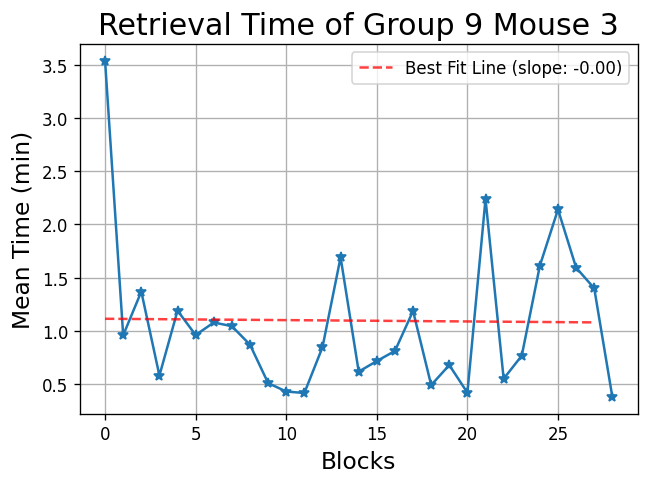

In [3]:
ctrl_all_times = []
ctrl_mean = []
ctrl_pred = []
ctrl_slope = []
rev_ctrl_time_dict = {}

for sheet in rev_ctrl_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_ctrl_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_ctrl_path, sheet, day=day, n_stds=3,
                            export_path=os.path.join(export_root, 'CASK_retrieval_time', f'ctrl_{sheet}.svg'))
    ctrl_all_times.append(times)
    ctrl_mean.append(mean)
    ctrl_pred.append(pred)
    ctrl_slope.append(slope)
    rev_ctrl_time_dict[sheet] = mean

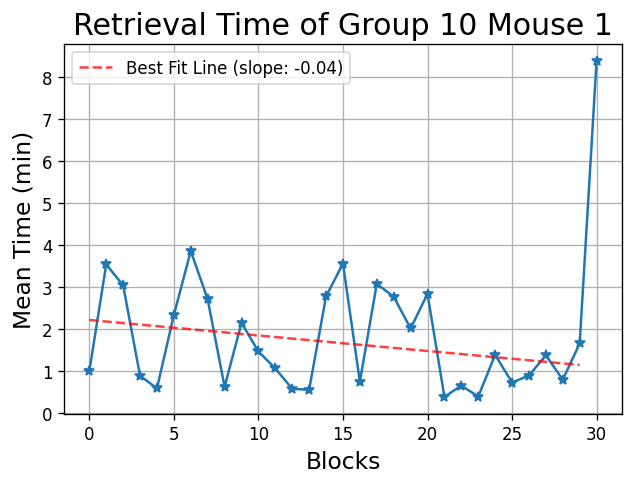

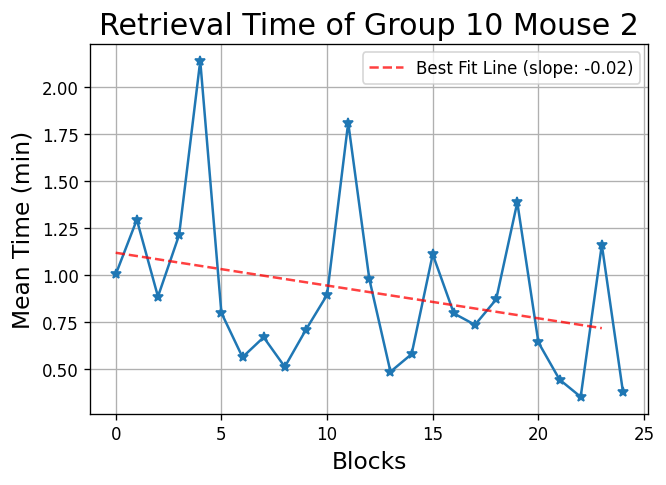

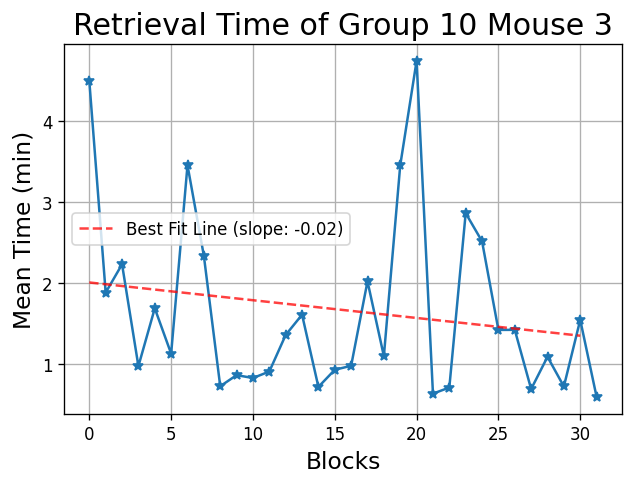

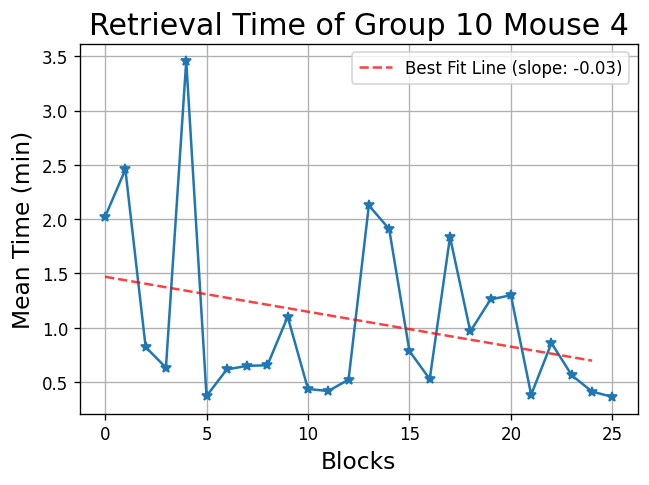

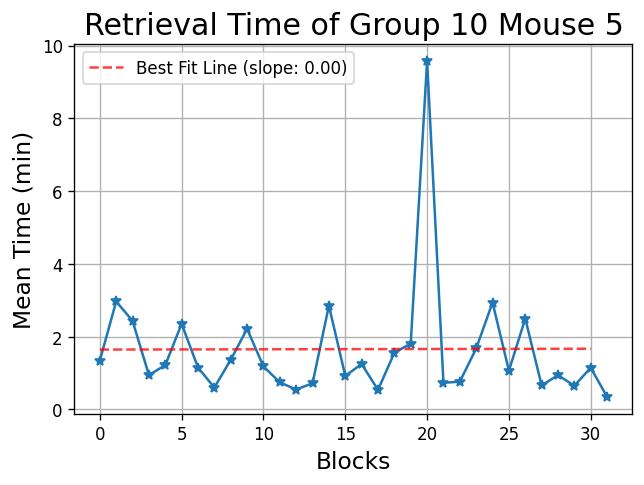

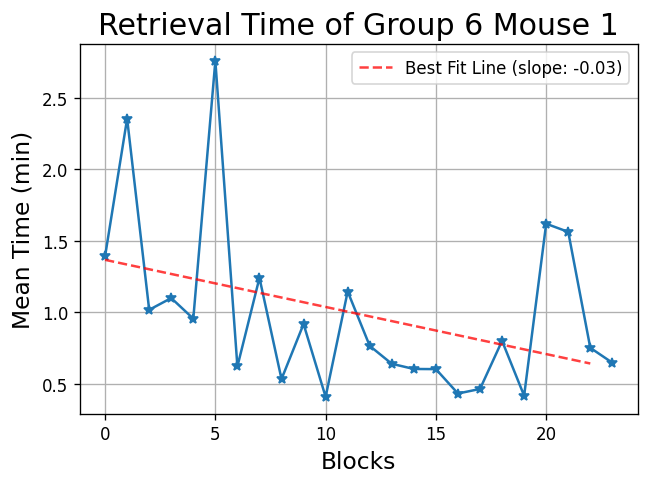

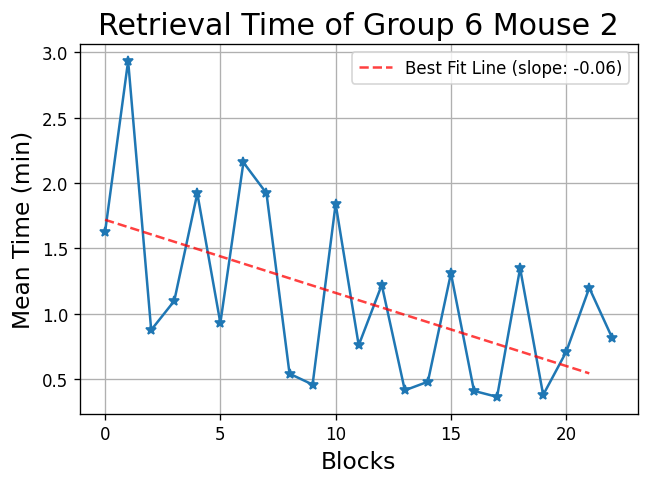

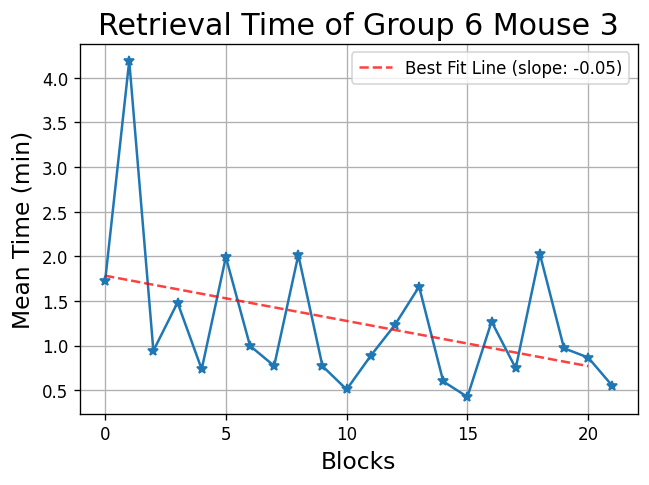

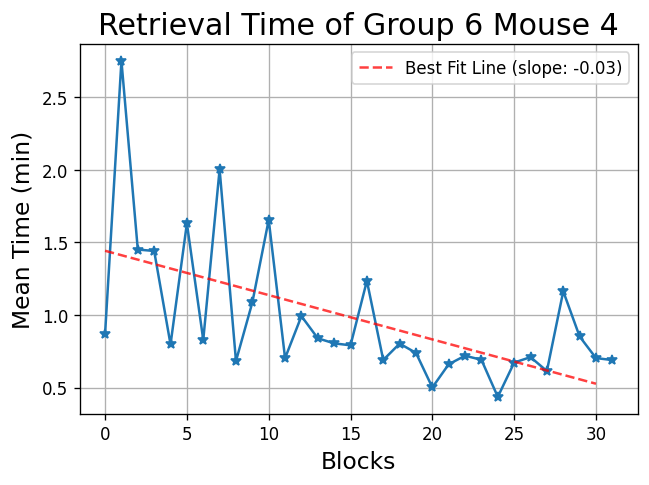

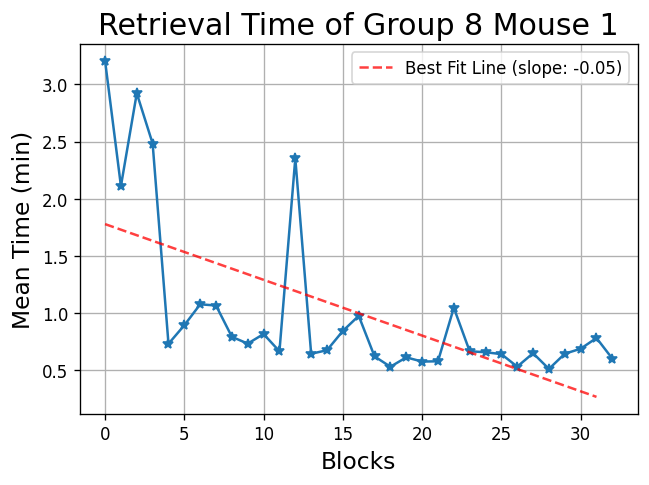

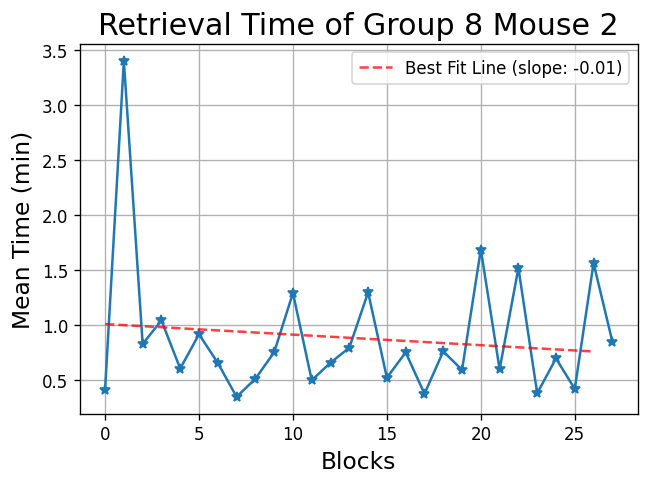

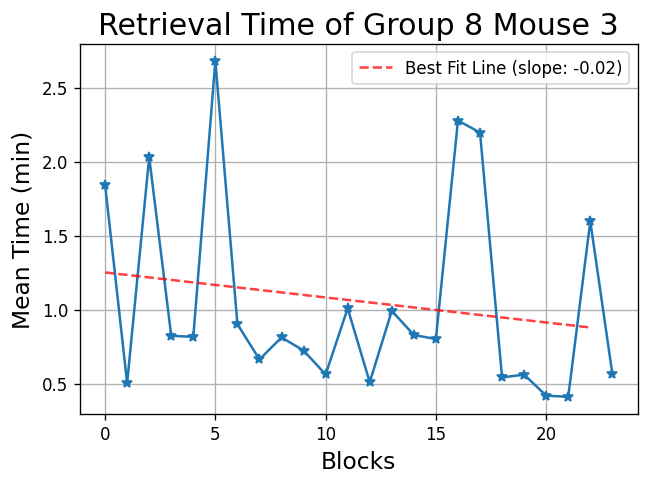

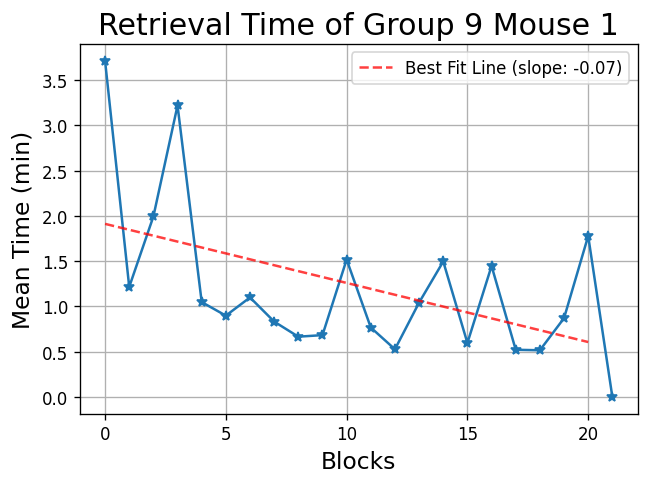

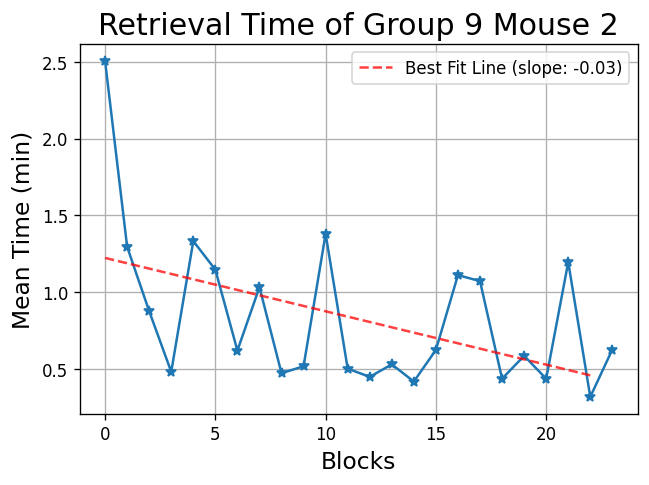

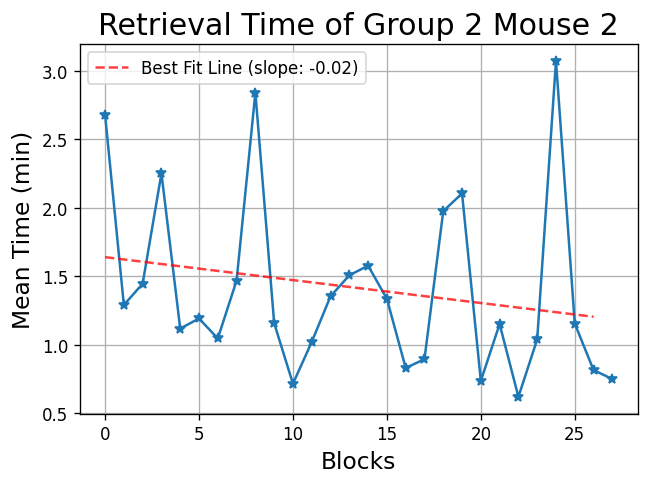

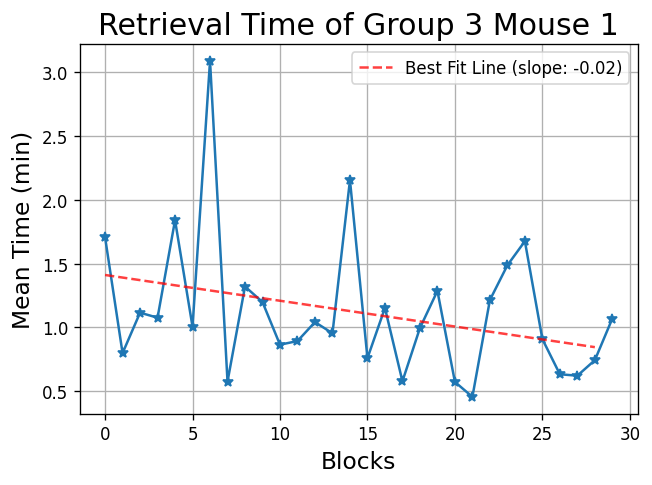

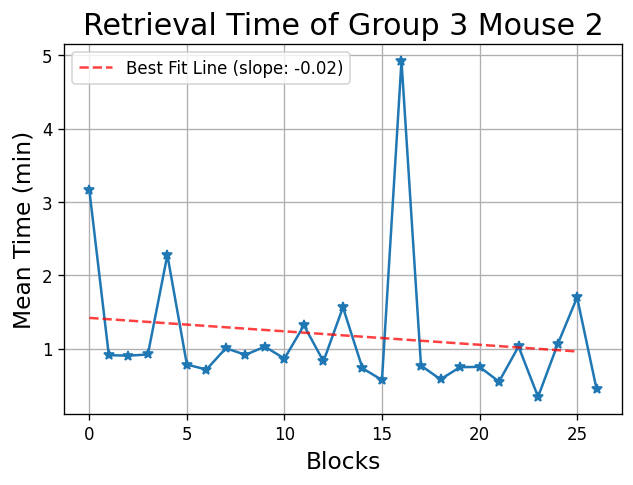

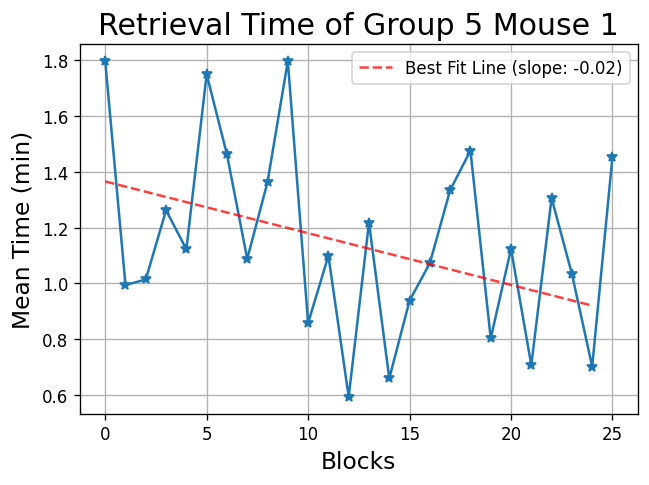

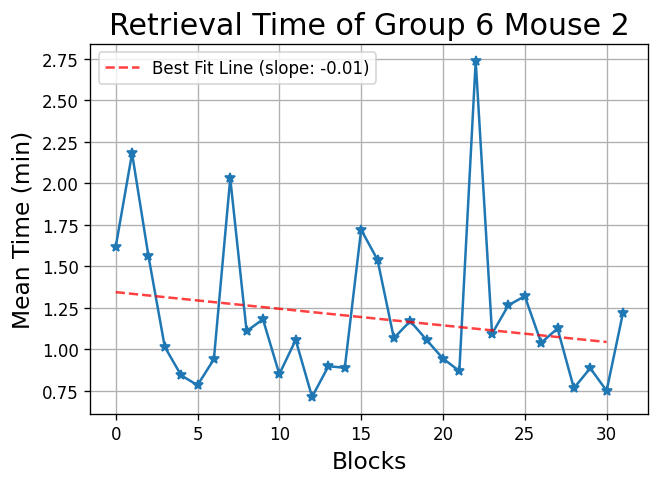

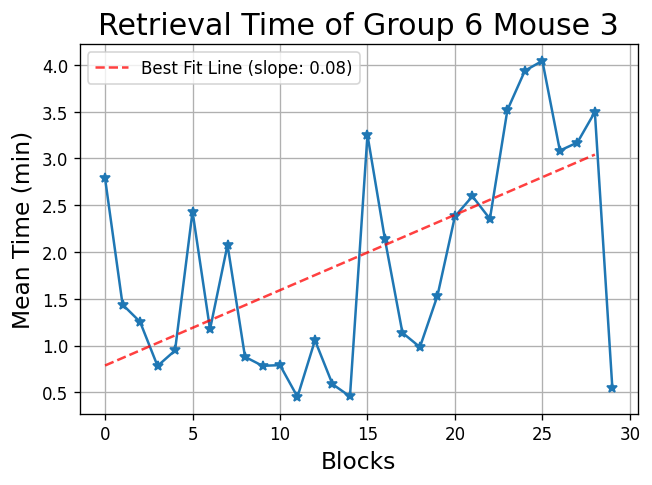

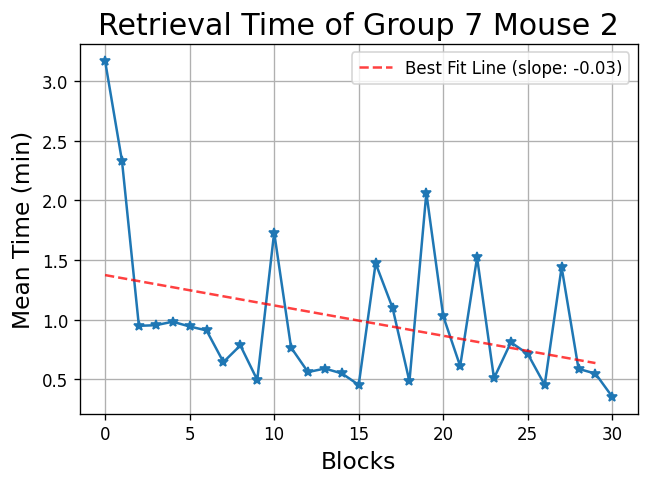

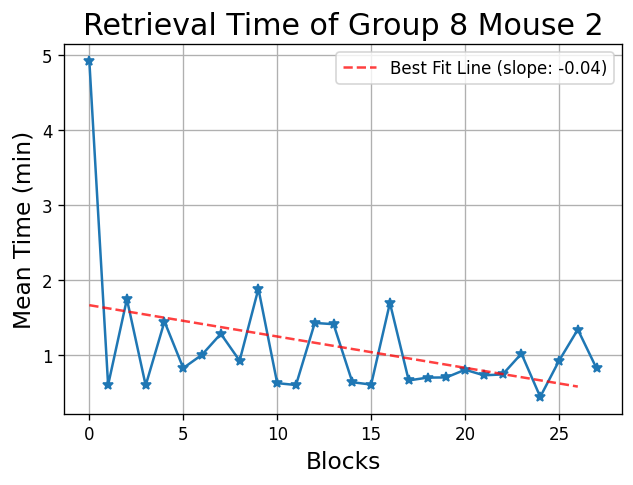

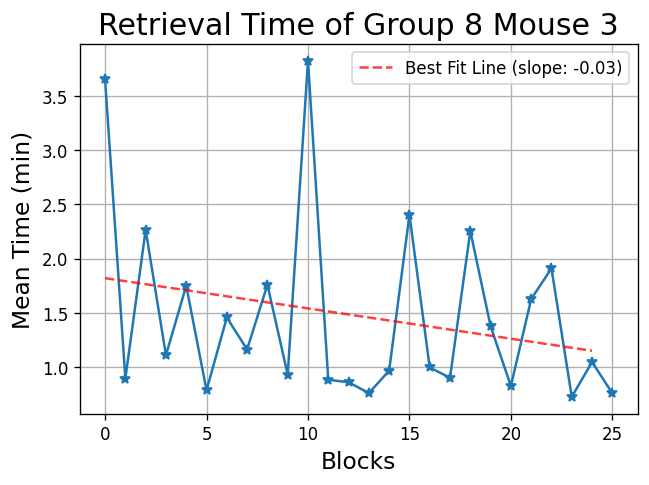

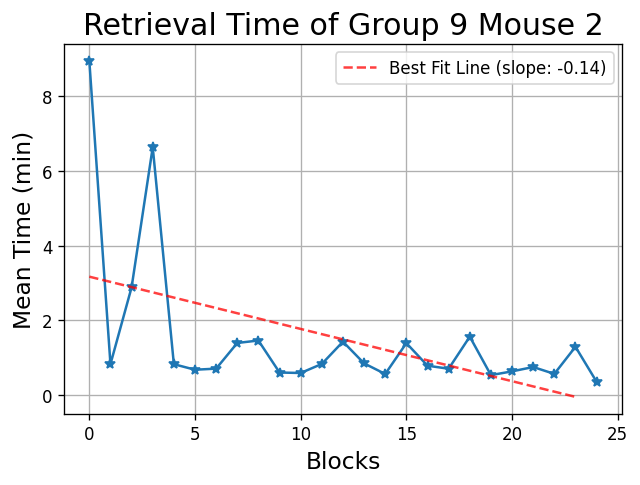

In [4]:
cask_all_times = []
cask_mean = []
cask_pred = []
cask_slope= []
rev_cask_time_dict = {}

for sheet in rev_cask_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_cask_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_cask_path, sheet, day=day, n_stds=3, 
                    export_path=os.path.join(export_root, 'CASK_retrieval_time', f'cask_{sheet}.svg'))

    cask_all_times.append(times)
    cask_mean.append(mean)
    cask_pred.append(pred)
    cask_slope.append(slope)
    rev_cask_time_dict[sheet] = mean

In [6]:
ctrl_mean.remove(max(ctrl_mean))
ctrl_mean.remove(max(ctrl_mean))
cask_mean.remove(max(cask_mean))

Ctrl Size: 25
CASK Size: 23
Ctrl Average: 1.3438558828965474
CASK Average: 1.2205920093165812
Ctrl Standard Deviation: 0.07698607959778758
CASK Standard Deviation: 0.05882089741622564


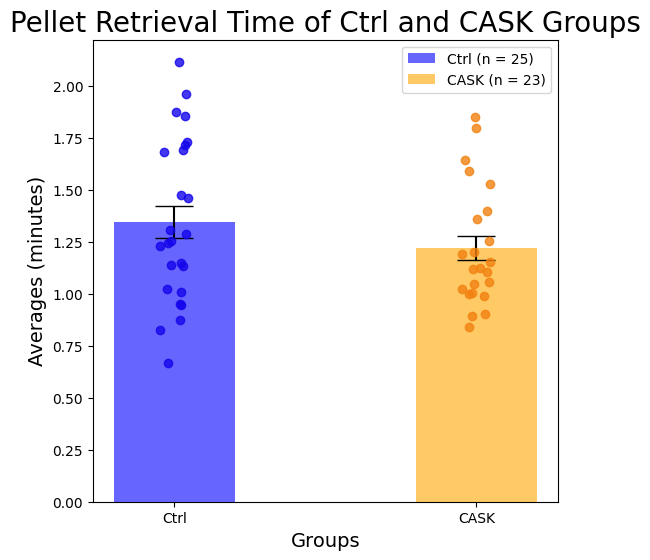

In [7]:
from accuracy import graph_group_stats
graph_group_stats(ctrl_mean, cask_mean, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_mean.svg'))

In [8]:
import intervals as invs

invs.perform_T_test(ctrl_mean, cask_mean, test_side='two-sided')

P Value is  0.22497076316835643
There is no significant difference between the two groups.


In [22]:
invs.perform_T_test(ctrl_slope, cask_slope, test_side='two-sided')

P Value is  0.5277283534805548
There is no significant difference between the two groups.


In [21]:
invs.perform_T_test(ctrl_pred, cask_pred, test_side='two-sided')

P Value is  0.07307934165043878
There is no significant difference between the two groups.


Ctrl Size: 27
CASK Size: 24
Ctrl Average: 1.3741229536079842
CASK Average: 0.8603658288903387
Ctrl Standard Deviation: 0.2351484662254756
CASK Standard Deviation: 0.1226812938866745


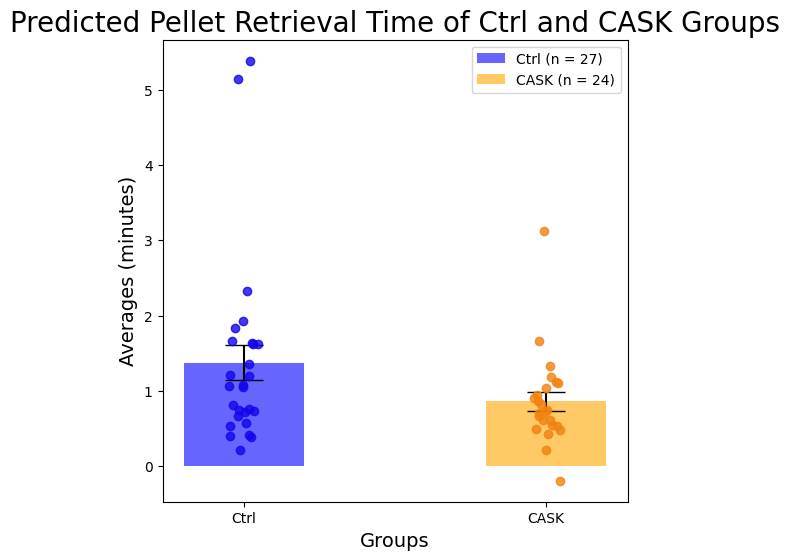

In [9]:
graph_group_stats(ctrl_pred, cask_pred, 'Predicted Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_retrieval_pred.svg'))

Ctrl Size: 27
CASK Size: 24
Ctrl Average: -0.038148148148148146
CASK Average: -0.029583333333333336
Ctrl Standard Deviation: 0.010657880087816025
CASK Standard Deviation: 0.007228396132486664


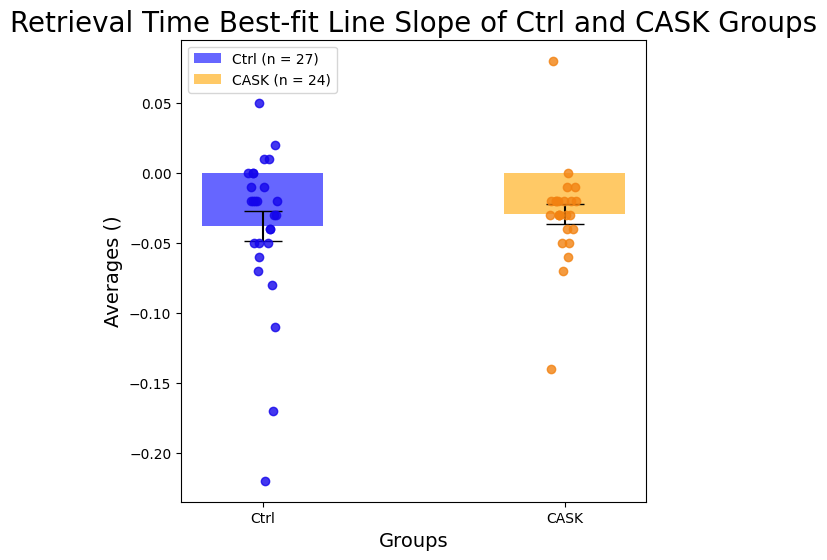

In [10]:
graph_group_stats(ctrl_slope, cask_slope, 'Retrieval Time Best-fit Line Slope', group_names=['Ctrl', 'CASK'], unit='', 
                  export_path=os.path.join(export_root, 'cask_retrieval_slope.svg'))

In [19]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []
fr1_ctrl_dict = {}

for sheet in fr1_ctrl_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_ctrl_path, sheet, remove_outlier=True, n_stds=2, day=3)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)
    fr1_ctrl_dict[sheet] = mean

In [12]:
cask_all_times = []
cask_means = []
cask_stds = []
fr1_cask_dict = {}

for sheet in fr1_cask_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_cask_path, sheet, remove_outlier=True, n_stds=2, day=3)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)
    fr1_cask_dict[sheet] = mean

In [20]:
ctrl_means.remove(max(ctrl_means))

Ctrl Size: 34
CASK Size: 31
Ctrl Average: 2.706667098207946
CASK Average: 2.278916358197908
Ctrl Standard Deviation: 0.18238349421716377
CASK Standard Deviation: 0.1279501259004111


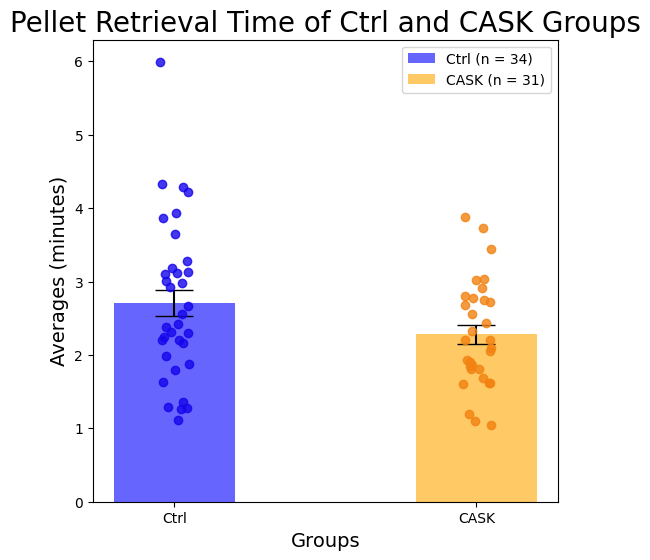

In [21]:
graph_group_stats(ctrl_means, cask_means, 'Pellet Retrieval Time', group_names=['Ctrl', 'CASK'], unit='minutes', 
                  export_path=os.path.join(export_root, 'cask_fr1_retrieval_mean.svg'))

In [22]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='two-sided')

P Value is  0.067943666346603
There is no significant difference between the two groups.


In [17]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='two-sided')

P Value is  0.08943678822759786
There is no significant difference between the two groups.


## Correlation

In [23]:
import numpy as np
import pickle

fr1_ctrl_acc, fr1_cask_acc = pickle.load(open('./ctrl_fr1_acc.pkl', 'rb'))

shared_fr1_ctrl_acc = []
shared_fr1_cask_acc = []
shared_rev_ctrl_dict = []
shared_rev_cask_dict = []

full_fr1_ctrl_acc = []
full_fr1_cask_acc = []
full_fr1_ctrl_time = []
full_fr1_cask_time = []

# reversal retrieval time vs. FR1 accuracy
for each in np.intersect1d(list(rev_cask_time_dict.keys()), list(fr1_cask_acc.keys())):
    shared_fr1_cask_acc.append(fr1_cask_acc[each])
    shared_rev_cask_dict.append(rev_cask_time_dict[each])

for each in np.intersect1d(list(rev_ctrl_time_dict.keys()), list(fr1_ctrl_acc.keys())):
    shared_fr1_ctrl_acc.append(fr1_ctrl_acc[each])
    shared_rev_ctrl_dict.append(rev_ctrl_time_dict[each])

# FR1 accuracy vs FR1 retrieval time
for key, value in fr1_cask_acc.items():
    full_fr1_cask_acc.append(value)
    full_fr1_cask_time.append(fr1_cask_dict[key])
    
for key, value in fr1_ctrl_acc.items():
    full_fr1_ctrl_acc.append(value)
    full_fr1_ctrl_time.append(fr1_ctrl_dict[key])
    

In [24]:
np.corrcoef(shared_fr1_cask_acc, shared_rev_cask_dict)[0, 1]

0.09074836566007609

In [25]:
np.corrcoef(shared_fr1_ctrl_acc, shared_rev_ctrl_dict)[0, 1]

-0.006124510484010387

In [26]:
np.corrcoef(full_fr1_cask_acc, full_fr1_cask_time)[0, 1]

-0.3001981733501715

In [27]:
np.corrcoef(full_fr1_ctrl_acc, full_fr1_ctrl_time)[0, 1]

-0.04130073548492453